In [19]:
from tensorflow.keras.datasets import cifar10
import numpy as np

# load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions.
input_shape = x_train.shape[1:]

In [15]:
import pickle
import functions

def values(isTT, params):
    number_of_params = []
    best_val_err = [[], [], []]
    best_val_loss = [[], [], []]
    names_by_clip = ["", "_clip_05", "_clip_1"]
    for i in params:
        if isTT:
            number_of_params.append(functions.define_and_compile_ResNet_model(
                input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=i)[0].count_params())
        else:
            number_of_params.append(functions.define_and_compile_ResNet_model(
                input_shape, conv_layer = functions.CircConv2D, n=i)[0].count_params())
        for j in range(len(names_by_clip)):
            if isTT:
                if i != 1:
                    history = pickle.load(open('R_' + str(i) + '_trainHistoryDict' + names_by_clip[j] + "_200_epochs", "rb"))
                else:
                    history = pickle.load(open('trainHistoryDict' + names_by_clip[j] + "_200_epochs", "rb"))
            else:
                history = pickle.load(open('n_' + str(i) + '_trainHistoryDict' + names_by_clip[j], "rb"))
            ind = np.argmax(history['val_acc'])
            best_val_loss[j].append(history['val_loss'][ind])
            best_val_err[j].append(1 - history['val_acc'][ind])
    number_of_params.append(functions.define_and_compile_ResNet_model(input_shape)[0].count_params())
    for j in range(len(names_by_clip)):
        history = pickle.load(open('simple_trainHistoryDict' + names_by_clip[j] + "_200_epochs", "rb"))
        ind = np.argmax(history['val_acc'])
        best_val_loss[j].append(history['val_loss'][ind])
        best_val_err[j].append(1 - history['val_acc'][ind])
    return number_of_params, best_val_err, best_val_loss

In [20]:
number_of_params_tt, best_val_err_tt, best_val_loss_tt = values(True, (1, 2, 4, 8, 10, 16, 20, 32))
number_of_params_cc, best_val_err_cc, best_val_loss_cc = values(False, (7, 5, 3, 2))

Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
input_channel number is less than n, shrinking n forcibly
Learning rate:  0.001
input_channel number is less than n, shrinking n forcibly
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001


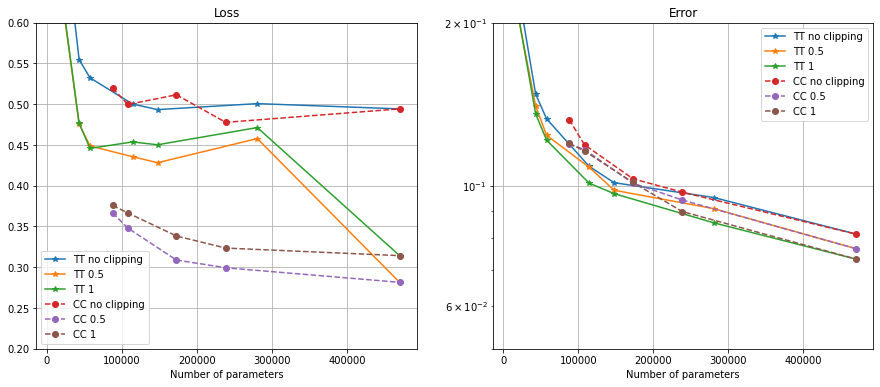

In [52]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].grid(True)
axs[1].grid(True)
axs[0].plot(number_of_params_tt, best_val_loss_tt[0], '*', linestyle='-', label='TT no clipping')
axs[0].plot(number_of_params_tt, best_val_loss_tt[1], '*', linestyle='-', label='TT 0.5')
axs[0].plot(number_of_params_tt, best_val_loss_tt[2], '*', linestyle='-', label='TT 1')
axs[0].plot(number_of_params_cc, best_val_loss_cc[0], 'o', linestyle='--', label='CC no clipping')
axs[0].plot(number_of_params_cc, best_val_loss_cc[1], 'o', linestyle='--', label='CC 0.5')
axs[0].plot(number_of_params_cc, best_val_loss_cc[2], 'o', linestyle='--', label='CC 1')
axs[0].set_title('Loss')
axs[0].set_xlabel('Number of parameters')
axs[0].set_ylim(0.2, 0.6)

axs[1].plot(number_of_params_tt, best_val_err_tt[0], '*', linestyle='-', label='TT no clipping')
axs[1].plot(number_of_params_tt, best_val_err_tt[1], '*', linestyle='-', label='TT 0.5')
axs[1].plot(number_of_params_tt, best_val_err_tt[2], '*', linestyle='-', label='TT 1')
axs[1].plot(number_of_params_cc, best_val_err_cc[0], 'o', linestyle='--', label='CC no clipping')
axs[1].plot(number_of_params_cc, best_val_err_cc[1], 'o', linestyle='--', label='CC 0.5')
axs[1].plot(number_of_params_cc, best_val_err_cc[2], 'o', linestyle='--', label='CC 1')
axs[1].set_title('Error')
axs[1].set_xlabel('Number of parameters')
axs[1].set_yscale('log')
axs[1].set_ylim(0.05, 0.2)

axs[0].legend(loc='best')
_ = axs[1].legend(loc='best')

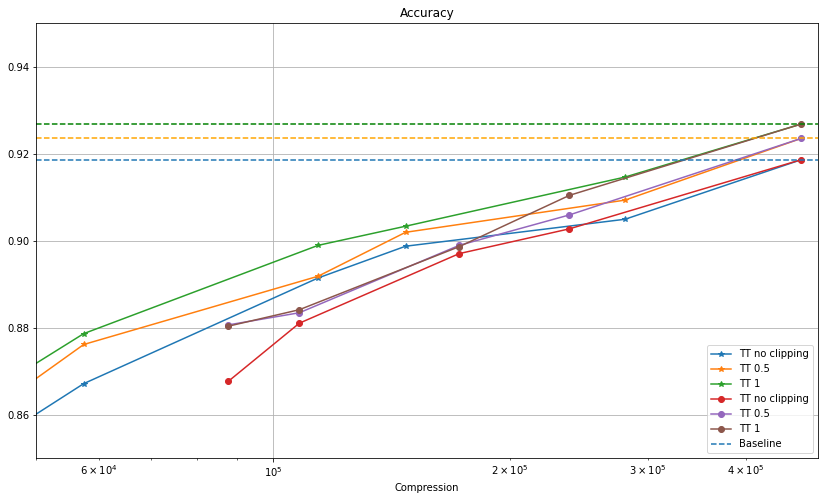

In [42]:
plt.figure(figsize=(14, 8))
plt.grid(True)

best_val_err_tt = np.array(best_val_err_tt)
best_val_err_cc = np.array(best_val_err_cc)

plt.plot(number_of_params_tt, 1 - best_val_err_tt[0], '*', linestyle='-', label='TT no clipping')
plt.plot(number_of_params_tt, 1 - best_val_err_tt[1], '*', linestyle='-', label='TT 0.5')
plt.plot(number_of_params_tt, 1 - best_val_err_tt[2], '*', linestyle='-', label='TT 1')
plt.plot(number_of_params_cc, 1 - best_val_err_cc[0], 'o', linestyle='-', label='TT no clipping')
plt.plot(number_of_params_cc, 1 - best_val_err_cc[1], 'o', linestyle='-', label='TT 0.5')
plt.plot(number_of_params_cc, 1 - best_val_err_cc[2], 'o', linestyle='-', label='TT 1')
plt.axhline(1 - best_val_err_tt[0][-1], linestyle='--', label='Baseline')
plt.axhline(1 - best_val_err_tt[1][-1], linestyle='--', c='orange')
plt.axhline(1 - best_val_err_tt[2][-1], linestyle='--', c='green')
plt.title('Accuracy')
plt.xlabel('Compression')
plt.ylim(0.85, 0.95)
plt.xlim(50000)
plt.xscale('log')
_ = plt.legend(loc='best')